This script runs one param_set. Outputs results{}.csv and trialxtrial{}.csv

In [1]:
import sys
# print("Python version")
# print (sys.version)

# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
from sklearn import metrics
import pandas as pd

from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from scipy.special import logsumexp
from scipy.stats import norm
from glob import glob

In [2]:
from CSWSEM import generate_exp, single_exp
from vanilla_lstm import VanillaLSTM
from sem.event_models import NonLinearEvent

TensorFlow Version: 2.3.1


### gridsearch params 

In [3]:
# parameter search over lr, n_epochs, alpha, lambda
model_type        = str('SEM')
lr                = float(0.05)
n_epochs          = int(1)    
log_alpha         = float(0.0)  # sCRP alpha is set in log scale
log_lambda        = float(0.0)  # sCRP lambda is set in log scale

In [4]:
# toggle between SEM (False) and LSTM (True)
if model_type == 'SEM':
  no_split=False
elif model_type == 'LSTM':
  no_split=True

In [5]:
condition = 'single'
# number of model replicas 
n_batch = 64
# number of trials
n_train = 40
n_test = 10

### SEM configuration

In [6]:
story_kwargs = dict(seed=None, err=0.2, actor_weight=1.0, instructions_weight=0.0)

optimizer_kwargs = dict(
    lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-5, amsgrad=False
) 

f_opts=dict(
  batch_size=25, 
  batch_update=False, 
  dropout=0.0,
  l2_regularization=0.0, 
  n_epochs=n_epochs,
    optimizer_kwargs=optimizer_kwargs
)

f_class = VanillaLSTM # event model class

# final param dict
sem_kwargs = dict(
  lmda=np.exp(log_lambda), 
  alfa=np.exp(log_alpha), 
  f_opts=f_opts, 
  f_class=f_class
)


# Run model

main fun call

In [7]:
""" 
batch_exp main fun call
"""

results, trialXtrial, _ = single_exp(
              sem_kwargs, story_kwargs, no_split=no_split, 
              n_train=n_train, n_test=n_test,
              n_batch=n_batch, condition=condition
)

seed 99 condition single


In [8]:
# convert from JSON file format (dict) to pandas df
results = pd.DataFrame(results)
trialXtrial = pd.DataFrame(trialXtrial)

In [9]:
trialXtrial

,t,e_hat,accuracy,pe,seed,condition
0,0,0,0.160690,0.895480,99,single
1,1,1,0.547225,0.774124,99,single
2,2,0,0.864460,0.480335,99,single
3,3,1,0.525883,0.585448,99,single
4,4,0,0.443478,0.526268,99,single
5,5,1,0.167859,0.629528,99,single
6,6,0,0.858338,0.482586,99,single
7,7,2,0.600728,0.667413,99,single
8,8,0,0.489051,0.551695,99,single
9,9,1,0.539300,0.454349,99,single


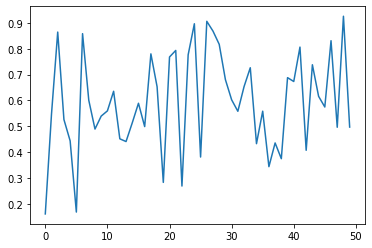

In [10]:
plt.plot(trialXtrial.accuracy)

In [11]:
trialXtrial
assert False

AssertionError: 

# save


In [ ]:
model_tag = "%s-lr-%.3f-nepchs-%i-alpha-%.3f-lambda-%.3f"%(
  model_type,lr,n_epochs,log_alpha,log_lambda
)
print(model_tag)

save_dir = 'data/gridsearch_toy/'
results_fpath = save_dir + "results_" + model_tag + '.csv'
trial_fpath = save_dir + "trial_X_trial_" + model_tag + '.csv'

In [ ]:
results.to_csv(results_fpath)
trialXtrial.to_csv(trial_fpath)